### <strong>Hand Written Digit Prediction - Classification Analysis</strong>

<p><strong>The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset strores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each iamge represents.</strong></p>

### <strong>Data source</strong>

<p><strong></strong>Using load_digits dataset from the sklearn datasets library</strong></p>

### <b>Import Library</b>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

### <b>Import Data</b>

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

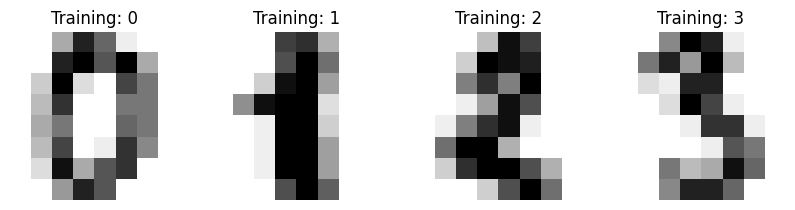

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image,label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### <b>Data Preprocessing</b>

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

### <b>Scaling Image Data</b>

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data = data/16

In [18]:
data.min()

0.0

In [19]:
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

### Train Test Split Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

### <b>Random Forest Model</b>

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier()

### <b>Predict Test Data</b>

In [27]:
y_pred = rf.predict(X_test)

In [28]:
y_pred

array([1, 4, 5, 6, 7, 9, 7, 0, 5, 0, 7, 8, 4, 7, 1, 8, 1, 7, 6, 5, 9, 5,
       9, 7, 7, 4, 3, 2, 9, 1, 7, 9, 3, 4, 2, 8, 9, 2, 7, 9, 6, 3, 4, 3,
       0, 5, 2, 4, 8, 7, 5, 2, 3, 0, 1, 6, 6, 9, 0, 3, 0, 7, 6, 9, 5, 8,
       1, 8, 4, 1, 2, 8, 3, 4, 9, 7, 8, 4, 2, 2, 8, 6, 6, 2, 3, 2, 6, 3,
       2, 3, 1, 0, 0, 6, 6, 5, 1, 2, 8, 4, 5, 3, 6, 6, 3, 5, 6, 2, 5, 8,
       3, 1, 2, 1, 1, 9, 2, 7, 4, 5, 6, 2, 2, 7, 7, 5, 3, 7, 0, 2, 2, 7,
       4, 3, 8, 3, 1, 5, 8, 7, 1, 6, 3, 9, 9, 3, 9, 3, 8, 4, 8, 3, 8, 1,
       4, 5, 3, 8, 3, 1, 7, 6, 0, 5, 8, 8, 0, 6, 4, 4, 5, 5, 7, 1, 3, 5,
       6, 4, 8, 9, 0, 0, 6, 2, 4, 1, 6, 9, 5, 5, 4, 7, 2, 5, 9, 2, 4, 3,
       8, 9, 8, 2, 5, 8, 1, 6, 1, 9, 8, 7, 7, 4, 6, 8, 4, 2, 0, 7, 1, 4,
       5, 2, 4, 2, 4, 3, 2, 2, 5, 7, 4, 5, 2, 3, 3, 8, 2, 3, 2, 9, 6, 6,
       1, 7, 3, 8, 9, 4, 9, 4, 8, 3, 8, 7, 0, 2, 3, 8, 7, 6, 1, 4, 0, 7,
       5, 1, 6, 9, 2, 0, 5, 9, 9, 0, 5, 1, 9, 5, 6, 7, 8, 2, 3, 7, 3, 4,
       6, 7, 3, 3, 7, 2, 7, 0, 0, 7, 2, 5, 3, 9, 0,

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(y_test, y_pred)

array([[38,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 65,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 61,  0,  1,  0,  2,  0,  2],
       [ 0,  0,  0,  0, 54,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  2, 49,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 48]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       1.00      1.00      1.00        58
           2       1.00      0.97      0.98        67
           3       1.00      0.92      0.96        66
           4       0.98      0.98      0.98        55
           5       0.94      0.96      0.95        48
           6       1.00      0.98      0.99        49
           7       0.92      0.98      0.95        57
           8       0.94      0.96      0.95        51
           9       0.92      0.96      0.94        50

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



### <strong>Explanation: Hand Written Digit Prediction - Classification Analysis</strong>
<p>Handwritten Digit Classification using Random Forests:

This project investigates the efficacy of a Random Forest Classifier for handwritten digit recognition. The approach leverages the sklearn.datasets library to access the load_digits dataset, comprised of grayscale images representing digits (0-9).

Data exploration involves visualization of the initial images using matplotlib.pyplot to understand the underlying structure (8x8 pixel arrays). Preprocessing entails data reshaping from a 3D array (images, width, height) to a 2D array (images, features) via flattening, followed by pixel intensity scaling (0-16 to 0-1) for improved model performance.

A train-test split (70%/30%) is implemented using sklearn.model_selection to segregate the data for training and evaluation purposes. The Random Forest Classifier, an ensemble learning model from sklearn.ensemble, is constructed to exploit the power of multiple decision trees, enhancing prediction accuracy and robustness.

Model training utilizes the fit method, allowing the model to learn the intricate relationships between pixel patterns and corresponding digits within the training data. Subsequently, the trained model is employed to predict digits for unseen images in the testing set using the predict method.

Evaluation entails leveraging confusion matrices and classification reports to assess model performance. The confusion matrix highlights the distribution of correct and misclassified digit predictions. The classification report provides detailed metrics (precision, recall, F1-score) for each digit class, offering insights into the model's effectiveness for individual digits.

In essence, this project demonstrates the application of Random Forest Classifiers for handwritten digit recognition, offering a framework for further exploration of hyperparameter tuning and potential improvements in classification accuracy.</p>